# Exploratory Data Analysis (EDA)

This notebook is for analyzing the relationships between different variables to figure out what research question to ask. This is done using various graphs and visualizations. There are labels at the end of each graph describing anything interesting about the graph.

We will also use this initial analysis to determine what variables we want to use in the later parts and determine our research question.

All of the graph outputs are accessible through the folder graphs -> eda

We will be working with the [Global Disaster Response Analysis dataset](https://www.kaggle.com/datasets/zubairdhuddi/global-daset) from Kaggle. Questions we intend exploring are related to how long it takes for a country to recover based on the aid amount and disaster type.

## Load Data

In [23]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

In [24]:
# load dataframe
import pandas as pd

df = pd.read_csv("data/global_disaster_response_2018_2024.csv")
df.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


View unique values of some colums

In [25]:
df['disaster_type'].value_counts()

disaster_type
Landslide            5130
Earthquake           5068
Flood                5039
Hurricane            5002
Extreme Heat         5001
Storm Surge          4988
Volcanic Eruption    4983
Wildfire             4954
Tornado              4939
Drought              4896
Name: count, dtype: int64

In [26]:
df['country'].value_counts()

country
Brazil           2591
Australia        2563
Turkey           2554
Bangladesh       2553
Spain            2543
China            2539
Chile            2529
Nigeria          2528
Germany          2526
India            2509
Greece           2503
Italy            2503
South Africa     2497
Japan            2472
Indonesia        2467
Canada           2438
Philippines      2437
Mexico           2433
United States    2413
France           2402
Name: count, dtype: int64

# Analyze relationships between variables

## Aid and response:

**Description of Methods:**
The following plots are joint plots that include a histogram of the distribution of each variable, along with a hexplot of the relationship between the two variables. The darker the the color in the hexplot, the more data points are in that region of the plot.

You may notice that we take the square root of some variables. This is to fit a previously curved diagram using a linear model (see the [Tuskey-Mosteller Bulging Rule](https://sites.stat.washington.edu/pds/stat423/Documents/LectureNotes/notes.423.ch4.pdf)).

To visualize the relationship between aid amount and disaster effects/response times, let's graph the following:

1. Joint plot: aid amount and response efficiency
2. Joint plot: aid amount and response time
3. Joint plot: aid amount and economic loss
4. Joint plot: aid amount and casualties

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/eda/1_aid_efficiency.jpg'

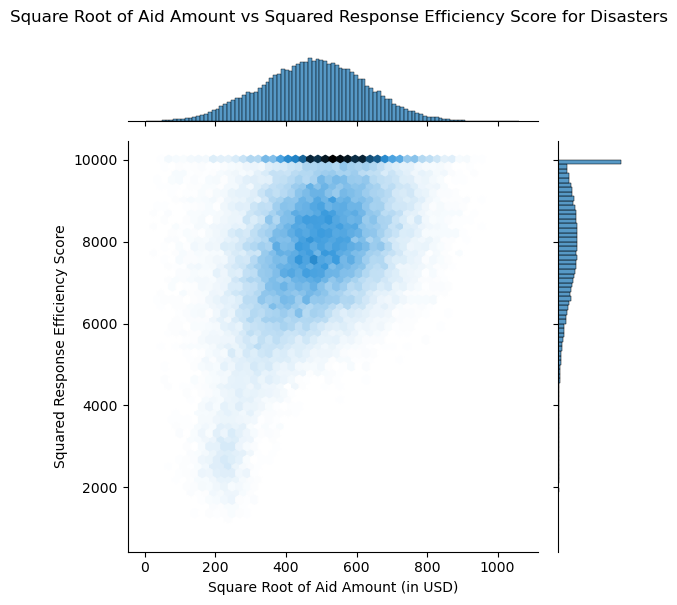

In [27]:
# joint plot of square root of aid amount and response efficiency

g = sns.jointplot(data=df, x=np.sqrt(df['aid_amount_usd']), y=df['response_efficiency_score']**2, kind='hex')
g.fig.suptitle('Square Root of Aid Amount vs Squared Response Efficiency Score for Disasters', y=1)  # y=1 moves it above
plt.xlabel('Square Root of Aid Amount (in USD)')
plt.ylabel('Squared Response Efficiency Score')
plt.tight_layout()
# Saving the plot as a JPEG file
plt.savefig("graphs/eda/1_aid_efficiency.jpg", bbox_inches='tight')

The original distribution of aid amount is skewed to the right, so after taking its square root, it becomes roughly normal. The distribution of the response efficiency score is more dense around 70-100, with a very high concentration at 100. Below 100, the distribution also follows a bell-shaped curve. If we were to use the response efficiency score in a predicitive model, we would need to account for the high concentration of 100's. Disregarding the zeros, we can see a somewhat positive linear relationship between the two variables.

In [ ]:
# joint plot of aid amount and response efficiency

g = sns.jointplot(data=df, x=np.sqrt(df['aid_amount_usd']), y=np.sqrt(df['response_time_hours']), kind='hex');
g.fig.suptitle('Square Root of Aid Amount vs Square Root of Response Time for Disasters', y=1)  # y=1 moves it above
plt.xlabel('Square Root of Aid Amount (in USD)')
plt.ylabel('Square Root of Response Time (in hours)')
plt.tight_layout()
# Saving the plot as a JPEG file
plt.savefig("graphs/eda/2_aid_response_time.jpg", bbox_inches='tight')

This is very similar to the graph above, reflected across the x-axis. The distribution of the response efficiency score is more dense around 0-30, with a very high concentration at 0. Above 0, the distribution also follows a bell-shaped curve. If we were to use the response efficiency score in a predicitive model, we would need to account for the high concentration of 0's. Disregarding the zeros, we can see a somewhat negative relationship between the two variables.

In [ ]:
# Create the jointplot
g = sns.jointplot(data=df, x=np.sqrt(df['aid_amount_usd']), y=np.sqrt(df['economic_loss_usd']), kind='hex')

# Add regression line
x = np.sqrt(df['aid_amount_usd'])
y = np.sqrt(df['economic_loss_usd'])
sns.regplot(x=x, y=y, scatter=False, ax=g.ax_joint, color='red', line_kws={'linewidth': 2})

# Calculate correlation coefficient
r, p_value = stats.pearsonr(x, y)

# Add correlation text to the plot
g.ax_joint.text(0.05, 0.95, f'r = {r:.3f}\np < {p_value:.3f}', 
                transform=g.ax_joint.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=10)

g.fig.suptitle('Square Root of Aid Amount vs Square Root of Economic Loss for Disasters', y=1.02)
g.set_axis_labels('Square Root of Aid Amount (USD)', 'Square Root of Economic Loss (USD)')
plt.tight_layout()

# Saving the plot as a JPEG file
plt.savefig("graphs/eda/3_aid_econ_loss.jpg", bbox_inches='tight')

In [ ]:
# Create the jointplot
g = sns.jointplot(data=df, x=np.sqrt(df['aid_amount_usd']), y=np.sqrt(df['casualties']), kind='hex')

# Add regression line
x = np.sqrt(df['aid_amount_usd'])
y = np.sqrt(df['casualties'])
sns.regplot(x=x, y=y, scatter=False, ax=g.ax_joint, color='red', line_kws={'linewidth': 2})

# Calculate correlation coefficient
r, p_value = stats.pearsonr(x, y)

# Add correlation text to the plot
g.ax_joint.text(0.05, 0.95, f'r = {r:.3f}\np < {p_value:.3f}', 
                transform=g.ax_joint.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=10)

g.fig.suptitle('Square Root of Aid Amount vs Square Root of Casualties for Disasters', y=1.02)
g.set_axis_labels('Square Root of Aid Amount (USD)', 'Square Root of Casualties')  # Fixed ylabel
plt.tight_layout()

# Saving the plot as a JPEG file
plt.savefig("graphs/eda/4_aid_casualties.jpg", bbox_inches='tight')

The graphs above are very similar, both with a positive linear relationship and a correlation coefficient of 0.403. This would make aid amount an important variable in predicting economic losses and casualties. The relationship between the two variables could be positive because more damages would result in a higher aid amount. So aid amount is likely a response variable to the casualties and economic losses.

## Economic Loss Per Country

In [ ]:
# make a dataframe of the total aid amount received by countries from 2018-2024, grouped by country
aid_amount = df[['country', 'aid_amount_usd']].groupby(['country']).sum().sort_values('aid_amount_usd', ascending=False)
aid_amount

In [ ]:
# plot the aid received by countries in descending order
plt.bar(aid_amount.index, aid_amount['aid_amount_usd'] / 1e6)
plt.xlabel('Country')
plt.ylabel('Aid Amount (Millions USD)')
plt.title('Aid received by countries in descending order')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

The bars in the graph above do not look very different from each other. When graphing the economic loss per country, we can also use the percentage difference from the mean since all the values don't look very different when graphed from 0 to the maximum value.

In [ ]:
mean_aid = aid_amount['aid_amount_usd'].mean() # calculate the mean aid received by countries
pct_diff = ((aid_amount['aid_amount_usd'] - mean_aid) / mean_aid) * 100 # calculate the difference from the mean for all countries

plt.bar(aid_amount.index, pct_diff)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Country')
plt.ylabel('Percentage Difference from Mean (%)')
plt.title('Total Aid Amount: Deviation from Average')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Saving the plot as a JPEG file
plt.savefig("graphs/eda/5_aid_country.jpg", bbox_inches='tight')

The percent difference from the mean ranges from around -4% to 4%, with Brazil being the country receiving the most aid and the United States being the country receiving the least amount of aid.

In [ ]:
# make a dataframe of the total economic loss from countries from 2018-2024, grouped by country

country_loss = df[['country', 'economic_loss_usd']].groupby(['country']).sum().sort_values('economic_loss_usd', ascending=False)
country_loss

In [ ]:
mean_loss = country_loss['economic_loss_usd'].mean() # calculate the mean economic loss over all countries
pct_diff = ((country_loss['economic_loss_usd'] - mean_loss) / mean_loss) * 100 # calculate the difference from the mean per country

plt.bar(country_loss.index, pct_diff)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Country')
plt.ylabel('Percentage Difference from Mean (%)')
plt.title('Total Economic Loss by Country: Deviation from Average')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Saving the plot as a JPEG file
plt.savefig("graphs/eda/6_econ_loss_country.jpg", bbox_inches='tight')

In this graph, the total economic losses per country ranges from -3% from the mean to 4% from the mean. The country with the highest economic loss is Brazil, and the country with the lowest economic loss is France. While the economic loss may have similar trends to the amount of aid, this shows that it is not exactly the same because the country rankings in the economic loss graph and in the aid graph are not the same.

## Economic Loss per Disaster Type

In [ ]:
# Make a dataframe of total economic loss, grouped by disaster
disaster_loss = df[['disaster_type', 'economic_loss_usd']].groupby(['disaster_type']).sum().sort_values('economic_loss_usd', ascending=False)
disaster_loss

In [ ]:
mean_loss = disaster_loss['economic_loss_usd'].mean() # calculate the mean economic loss over all countries
pct_diff = ((disaster_loss['economic_loss_usd'] - mean_loss) / mean_loss) * 100 # calculate the difference from the mean per country

plt.bar(disaster_loss.index, pct_diff)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Country')
plt.ylabel('Percentage Difference from Mean (%)')
plt.title('Total Economic Loss by Disaster: Deviation from Average')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Saving the plot as a JPEG file
plt.savefig("graphs/eda/7_econ_loss_disaster.jpg", bbox_inches='tight')

This graph shows the how different the total economic loss by disaster is from the mean. Drought is much lower compared to the others at -4% from the mean, and volcanic eruptions are around 2% from the mean.

In [ ]:
# Make a dataframe of average severity, grouped by disaster
disaster_severity = df[['disaster_type', 'severity_index']].groupby(['disaster_type']).mean().sort_values('severity_index', ascending=False)
disaster_severity

In [ ]:
mean_severity = disaster_severity['severity_index'].mean() # calculate the mean economic loss over all countries
pct_diff = ((disaster_severity['severity_index'] - mean_severity) / mean_severity) * 100 # calculate the difference from the mean per country

plt.bar(disaster_severity.index, pct_diff)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Country')
plt.ylabel('Percentage Difference from Mean (%)')
plt.title('Total Severity per Disaster: Deviation from Average')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Saving the plot as a JPEG file
plt.savefig("graphs/eda/8_severity_disaster.jpg", bbox_inches='tight')

The mean severity per disaster shows less variation than the total economic loss, with tornados only being less than 2% above the mean and droughts being less than 2% below the mean. From the data, we can show that droughts have less impact and severity compared to the other disasters. For disasters like earthquakes, even though each event has an average of 1% below the mean, in total, they cause significant economic loss, both being higher than the average. Tornados, on the other hand, have a high severity per event, but the overall economic loss is lower than volcanic eruptions, landslides, and earthquakes.

# Main Takeaways from EDA
* Aid amount is likely affected by the number of casualties and economic loss because their plots show a positive linear trend.
* Efficiency score has a disproportionate number of values at 100 and response time has a disproportionate number of values at 0.
* Tornadoes, volcanic eruptions, and wildfires have the highest total severity per disaster from 2018-2024.
* Volcanic eruptions and landslides have the highest total economic loss over all disasters from 2018-2024.

Based on the data, a good research question to ask is, "What would the amount of aid received be, given the country and amount of economic loss?" This is because the graphs show that the amount of aid is correlated with the amount of economic loss, and the aid amount varies per country. Response time and efficiency score seem like they may not be heavily correlated with the aid amount, so they might introduce some noise into the model.